# Analysis of the problem

We want to analyze the behaviour of the solver according to different
distributions of the bricks' height.
Let's consider three distributions:
* uniform distribution in $(0,10)$
* gaussian distribution with mean 10 and standard deviation 1;
* multimodal distribution.

In [11]:
from _solver import GeneticBrickSolver
import random
random.seed(42)
import matplotlib.pyplot as plt
import numpy as np

To compare the performance of the solver we will set the parameters as
follows:

In [12]:
population_size = 20
max_generations = 50

mutation_rate = 0.1
crossover_rate = 0.8
k_elitism = 5
tournament_size = 10

columns_per_individual = 10
bricks_per_column = 8
number_of_bricks = columns_per_individual*bricks_per_column

We need a metric that allows us to compare the performance of the solver on different sets of bricks.

The fitness of the best individual found is not an appropriate metric to compare solutions of different problems because it is not scale invariant (i.e. we find always a better fitness value if we just devide by a factor $\lambda$ the bricks' height).

Let's define the following fitness function:
$$
    f_{\text{norm}}(C_1,\dots, C_{n}) 
    = \frac{f(C_1,\dots, C_{n})}{H_{max}} 
    = \frac{H_{max} -  H_{min}}{H_{max}} 
$$
where $f$ is the original fitness function of the problem, $H_{max}$ and $H_{max}$ are respectively the highest column the lowest column of the individual that contains tha columns $C_1,\dots, C_{n}$ .




In [13]:
def distribution_analysis(brick_heights):
    
    GBS = GeneticBrickSolver(population_size, mutation_rate, crossover_rate, max_generations, tournament_size, k_elitism)
    
    # Plot an histogram of the heights
    plt.hist(brick_heights, bins=20)
    plt.title('Histogram of the heights')
    plt.show()
    
    # Solve the problem
    GBS.solve(brick_heights, columns_per_individual, bricks_per_column)
    
    # Plot the fitness
    GBS.plot_fitness()
    
    # Evaluate the fitness and the normalized fitness of the best individual
    f = GBS.best_fitness
    f_norm = GBS.fitness_norm(GBS.best_individual)

    # Print the results
    print("Fitness of the best individual: ", f)
    print("Normalized fitness of the best individual: ", f_norm)

In [16]:
def iterative_analysis(n_iterations, method):
    
    f_norm_values = []
    
    for _ in range(n_iterations):
        unif_brick_heights = [method for _ in range(number_of_bricks)]
        GBS = GeneticBrickSolver(population_size, mutation_rate, crossover_rate, max_generations, tournament_size, k_elitism)
        GBS.solve(unif_brick_heights, columns_per_individual, bricks_per_column)
        f_norm_values.append(GBS.fitness_norm(GBS.best_individual))

    print(f_norm_values)
    return np.mean(f_norm_values), np.std(f_norm_values)

## Uniform Distribution

In [17]:
# Generate uniformly distributed random heights for the bricks from the range
# (0, 10)

method = random.uniform(0, 10)
mean_f_norm, std_f_norm = iterative_analysis(10, method)

print("Uniform distribution")
print("Mean fitness: ", mean_f_norm)
print("Standard deviation of the fitness: ", std_f_norm)
print("\n")


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Uniform distribution
Mean fitness:  0.0
Standard deviation of the fitness:  0.0




## Gaussian Distribution

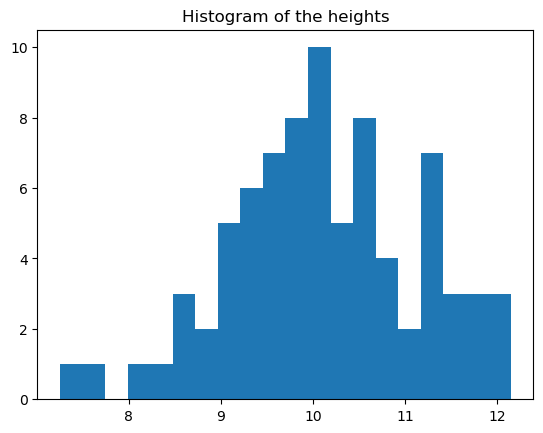

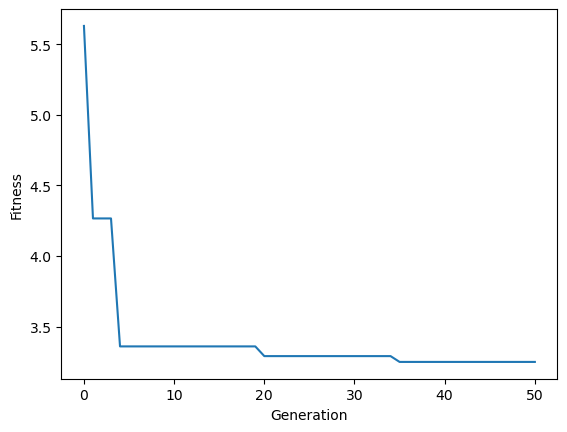

Fitness of the best individual:  3.2495657990588995
Normalized fitness of the best individual:  0.03975336142948667


In [6]:
# Generate gaussian distributed random heights for the bricks from the range
# with mean 10 and standard deviation 1
gaus_brick_heights = [random.gauss(10, 1) for _ in range(number_of_bricks)]

distribution_analysis(gaus_brick_heights)

# Multimodal distribution

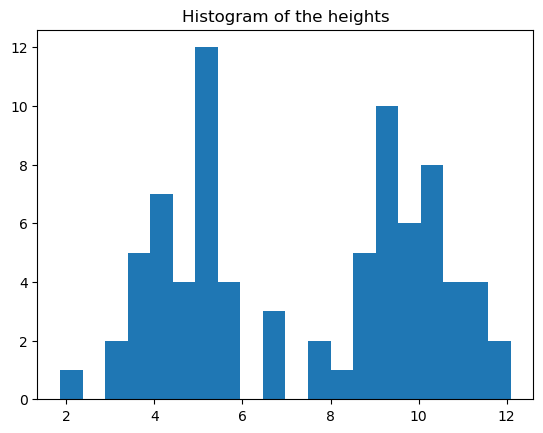

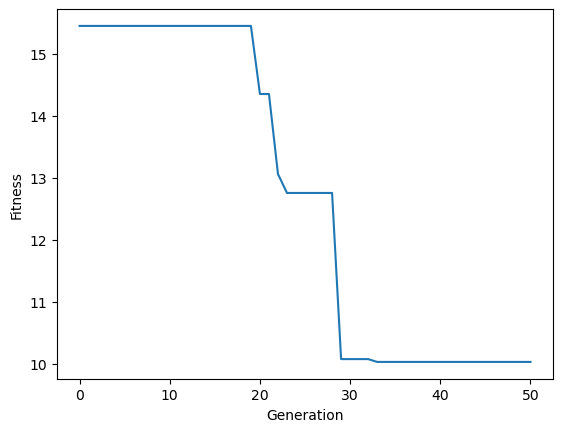

Fitness of the best individual:  10.027755928341563
Normalized fitness of the best individual:  0.15508084066383332


In [7]:
# Generate multimodal distributed random heights for the bricks from the range with mean 10 and standard deviation 1
mult_brick_heights = [random.gauss(10, 1) if random.random() < 0.5 else random.gauss(5, 1) for _ in range(number_of_bricks)]

distribution_analysis(mult_brick_heights)